In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df_redshift_data_all = pd.read_csv('redshift_data.csv')
df_redshift_data_all.head()

,fixture_mid,home_team,away_team,home_score,away_score,team_name,total_linebreaks,total_tries,total_supported_breaks,total_defenders_beaten,...,total_intercepts,total_tackles_made,total_tackles_missed,total_offloads,total_carries,total_carry_metres,total_carries_dominant,total_turnovers_conceded,total_penalties_conceded,won_lost
0,00bf8815-b73d-41da-ba47-4f66c7b796fb,Ulster Rugby,Zebre Parma,49,3,Ulster Rugby,12,7,14,42,...,1,148,22,25,148,586,25,14,10,1
1,00bf8815-b73d-41da-ba47-4f66c7b796fb,Ulster Rugby,Zebre Parma,49,3,Zebre Parma,4,0,0,22,...,0,167,42,3,105,241,11,14,8,0
2,018fb405-621d-4f1e-8eb2-255916b979e8,Connacht Rugby,Scarlets,14,20,Connacht Rugby,6,2,1,21,...,0,86,9,4,122,397,28,23,5,0
3,018fb405-621d-4f1e-8eb2-255916b979e8,Connacht Rugby,Scarlets,14,20,Scarlets,6,3,2,9,...,0,165,21,4,74,317,13,10,7,1
4,019bc849-1cd7-492c-8274-e2b55fd2e7c3,Munster Rugby,Leinster Rugby,10,13,Leinster Rugby,5,1,1,33,...,0,208,13,5,137,322,25,12,8,1


In [3]:
#Create new column for score difference 
# Create new column for score difference with initial default values
df_redshift_data_all['score_diff'] = 0

# Update the score difference where team_name is home_team
df_redshift_data_all.loc[df_redshift_data_all['team_name'] == df_redshift_data_all['home_team'], 'score_diff'] = df_redshift_data_all['home_score'] - df_redshift_data_all['away_score']

# Update the score difference where team_name is not home_team
df_redshift_data_all.loc[df_redshift_data_all['team_name'] != df_redshift_data_all['home_team'], 'score_diff'] = df_redshift_data_all['away_score'] - df_redshift_data_all['home_score']

df_redshift_data_all['margin'] = df_redshift_data_all['home_score'] - df_redshift_data_all['away_score']

# Remove outliers based on the 'score_difference' column
z_scores = np.abs(stats.zscore(df_redshift_data_all['margin']))
df_redshift_data_all = df_redshift_data_all[z_scores < 3]


df_redshift_data_all.head(10)

,fixture_mid,home_team,away_team,home_score,away_score,team_name,total_linebreaks,total_tries,total_supported_breaks,total_defenders_beaten,...,total_tackles_missed,total_offloads,total_carries,total_carry_metres,total_carries_dominant,total_turnovers_conceded,total_penalties_conceded,won_lost,score_diff,margin
0,00bf8815-b73d-41da-ba47-4f66c7b796fb,Ulster Rugby,Zebre Parma,49,3,Ulster Rugby,12,7,14,42,...,22,25,148,586,25,14,10,1,46,46
1,00bf8815-b73d-41da-ba47-4f66c7b796fb,Ulster Rugby,Zebre Parma,49,3,Zebre Parma,4,0,0,22,...,42,3,105,241,11,14,8,0,-46,46
2,018fb405-621d-4f1e-8eb2-255916b979e8,Connacht Rugby,Scarlets,14,20,Connacht Rugby,6,2,1,21,...,9,4,122,397,28,23,5,0,-6,-6
3,018fb405-621d-4f1e-8eb2-255916b979e8,Connacht Rugby,Scarlets,14,20,Scarlets,6,3,2,9,...,21,4,74,317,13,10,7,1,6,-6
4,019bc849-1cd7-492c-8274-e2b55fd2e7c3,Munster Rugby,Leinster Rugby,10,13,Leinster Rugby,5,1,1,33,...,13,5,137,322,25,12,8,1,3,-3
5,019bc849-1cd7-492c-8274-e2b55fd2e7c3,Munster Rugby,Leinster Rugby,10,13,Munster Rugby,2,1,0,13,...,33,4,139,194,24,13,9,0,-3,-3
6,01c49da6-4cc9-4585-b07f-5a864e8c77e2,Sharks,Edinburgh Rugby,5,21,Edinburgh Rugby,3,3,0,14,...,9,2,59,207,9,15,10,1,16,-16
7,01c49da6-4cc9-4585-b07f-5a864e8c77e2,Sharks,Edinburgh Rugby,5,21,Sharks,1,1,0,9,...,14,4,86,271,12,16,6,0,-16,-16
8,022ac248-fb38-4e74-8b71-b8fd9692e732,Stormers,Leinster Rugby,20,13,Leinster Rugby,3,1,1,14,...,29,11,81,218,10,11,16,0,-7,7
9,022ac248-fb38-4e74-8b71-b8fd9692e732,Stormers,Leinster Rugby,20,13,Stormers,4,2,1,29,...,14,10,83,319,5,13,12,1,7,7


In [4]:
# Define the features and target variable
X = df_redshift_data_all[[ 'total_linebreaks', 'total_tries', 'total_supported_breaks', 'total_defenders_beaten',
                'total_jackals_success', 'total_intercepts', 'total_tackles_made', 'total_tackles_missed',
                'total_offloads', 'total_carries', 'total_carry_metres', 'total_carries_dominant',
                'total_turnovers_conceded', 'total_penalties_conceded']]
y = df_redshift_data_all['score_diff']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression Training RMSE: 12.087810235826916
Linear Regression Training R2: 0.5859359148287026
Linear Regression Test RMSE: 11.448829815786217
Linear Regression Test R2: 0.5868775541664185


/Users/eben.opperman/Documents/Projects/match_event_weighting/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/eben.opperman/Documents/Projects/match_event_weighting/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


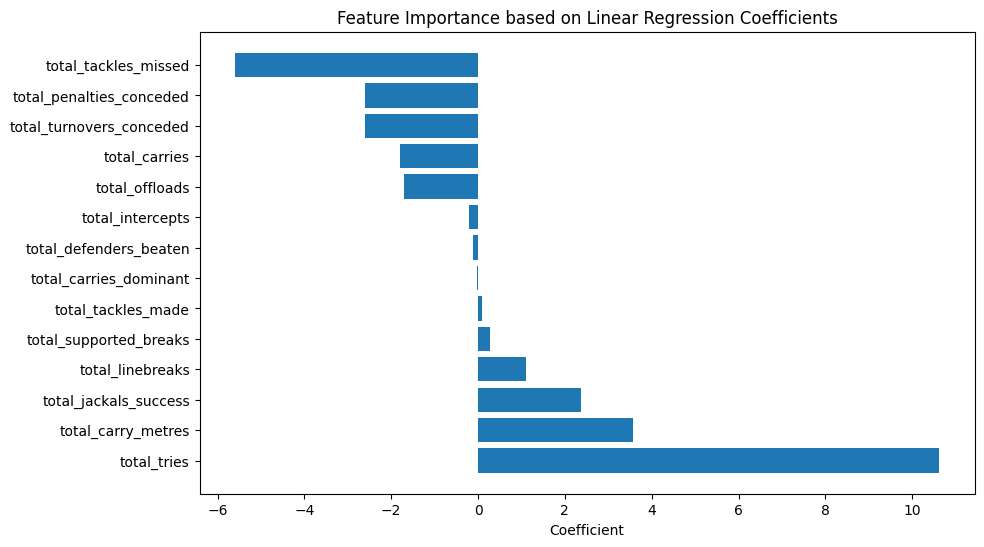

Linear Regression Coefficients
                     Feature  Coefficient
0                total_tries    10.626601
1         total_carry_metres     3.578483
2      total_jackals_success     2.366754
3           total_linebreaks     1.108664
4     total_supported_breaks     0.270564
5         total_tackles_made     0.101416
6     total_carries_dominant    -0.026134
7     total_defenders_beaten    -0.111313
8           total_intercepts    -0.209066
9             total_offloads    -1.708683
10             total_carries    -1.806272
11  total_turnovers_conceded    -2.604178
12  total_penalties_conceded    -2.614788
13      total_tackles_missed    -5.601872


In [5]:
# Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Predict and evaluate the Linear Regression model
y_pred_train_lr = linear_reg.predict(X_train_scaled)
y_pred_test_lr = linear_reg.predict(X_test_scaled)

print("Linear Regression Training RMSE:", mean_squared_error(y_train, y_pred_train_lr, squared=False))
print("Linear Regression Training R2:", r2_score(y_train, y_pred_train_lr))
print("Linear Regression Test RMSE:", mean_squared_error(y_test, y_pred_test_lr, squared=False))
print("Linear Regression Test R2:", r2_score(y_test, y_pred_test_lr))

# Get feature coefficients from the Linear Regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_reg.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance based on Linear Regression Coefficients')
plt.show()

# Create tables for coefficients and feature importances
coefficients_table = coefficients.reset_index(drop=True)
# Display the tables
print("Linear Regression Coefficients")
print(coefficients_table)

Random Forest Training RMSE: 4.7796114783262995
Random Forest Training R2: 0.9352622670968544
Random Forest Test RMSE: 11.148524906145136
Random Forest Test R2: 0.6082658719325118


/Users/eben.opperman/Documents/Projects/match_event_weighting/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/eben.opperman/Documents/Projects/match_event_weighting/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


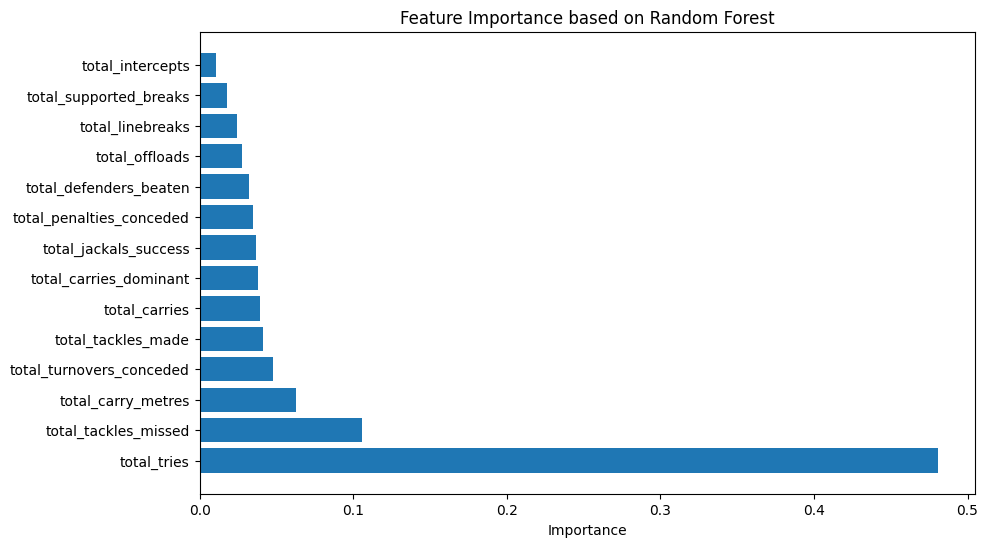


Random Forest Feature Importances
                     Feature  Importance
0                total_tries    0.480565
1       total_tackles_missed    0.106061
2         total_carry_metres    0.062920
3   total_turnovers_conceded    0.047846
4         total_tackles_made    0.041175
5              total_carries    0.039223
6     total_carries_dominant    0.038351
7      total_jackals_success    0.036635
8   total_penalties_conceded    0.034462
9     total_defenders_beaten    0.032439
10            total_offloads    0.027757
11          total_linebreaks    0.024231
12    total_supported_breaks    0.017694
13          total_intercepts    0.010640


In [6]:
# Train a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predict and evaluate the Random Forest Regressor
y_pred_train_rf = rf_reg.predict(X_train_scaled)
y_pred_test_rf = rf_reg.predict(X_test_scaled)

print("Random Forest Training RMSE:", mean_squared_error(y_train, y_pred_train_rf, squared=False))
print("Random Forest Training R2:", r2_score(y_train, y_pred_train_rf))
print("Random Forest Test RMSE:", mean_squared_error(y_test, y_pred_test_rf, squared=False))
print("Random Forest Test R2:", r2_score(y_test, y_pred_test_rf))

# Get feature importances from the Random Forest Regressor
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_reg.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance based on Random Forest')
plt.show()

feature_importances_table = feature_importances.reset_index(drop=True)
print("\nRandom Forest Feature Importances")
print(feature_importances_table)

Polynomial Regression Training RMSE: 11.11984347436716
Polynomial Regression Training R2: 0.6495955251321512
Polynomial Regression Test RMSE: 12.088896280826956
Polynomial Regression Test R2: 0.5393936772150882


/Users/eben.opperman/Documents/Projects/match_event_weighting/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/eben.opperman/Documents/Projects/match_event_weighting/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


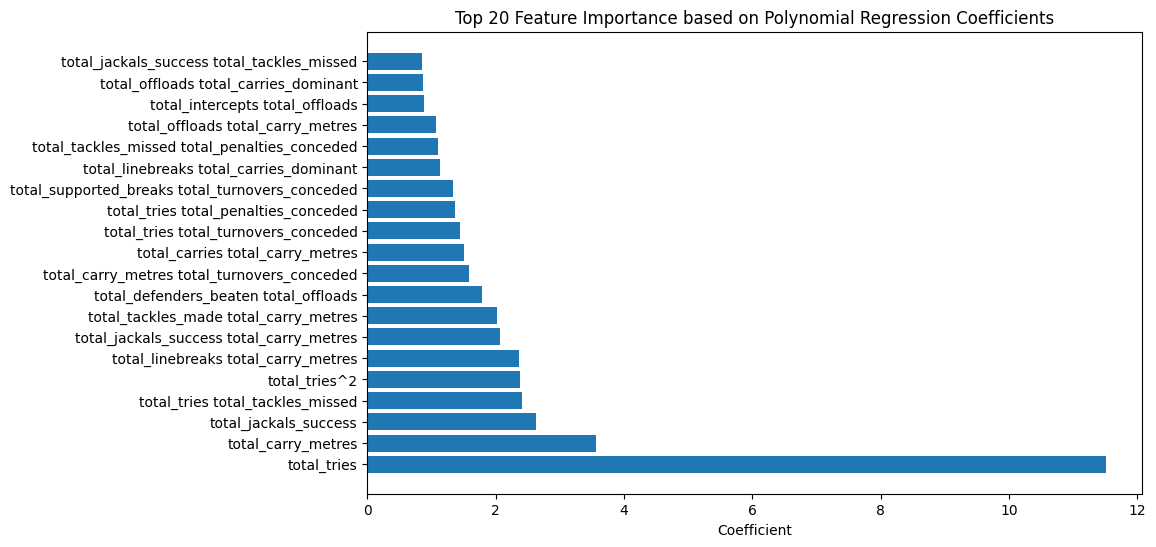

Polynomial Regression Coefficients
                                       Feature  Coefficient
0                                  total_tries    11.504243
1                           total_carry_metres     3.560408
2                        total_jackals_success     2.630328
3             total_tries total_tackles_missed     2.411792
4                                total_tries^2     2.382659
..                                         ...          ...
115                       total_carry_metres^2    -2.169332
116  total_linebreaks total_turnovers_conceded    -2.215986
117                   total_turnovers_conceded    -2.384769
118               total_offloads total_carries    -2.563686
119                       total_tackles_missed    -4.835476

[120 rows x 2 columns]


In [7]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train a Linear Regression model on polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict and evaluate the polynomial regression model
y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)

print("Polynomial Regression Training RMSE:", mean_squared_error(y_train, y_pred_train_poly, squared=False))
print("Polynomial Regression Training R2:", r2_score(y_train, y_pred_train_poly))
print("Polynomial Regression Test RMSE:", mean_squared_error(y_test, y_pred_test_poly, squared=False))
print("Polynomial Regression Test R2:", r2_score(y_test, y_pred_test_poly))

# Get feature coefficients from the polynomial regression model
# The number of features increases due to polynomial terms, so we'll print only the first few coefficients
coefficients_poly = pd.DataFrame({
    'Feature': poly.get_feature_names_out(X.columns),
    'Coefficient': poly_reg.coef_
})
coefficients_poly = coefficients_poly.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_poly['Feature'][:20], coefficients_poly['Coefficient'][:20])  # Plot top 20 features for readability
plt.xlabel('Coefficient')
plt.title('Top 20 Feature Importance based on Polynomial Regression Coefficients')
plt.show()

# Create a table for polynomial regression coefficients
coefficients_poly_table = coefficients_poly.reset_index(drop=True)
# Display the table
print("Polynomial Regression Coefficients")
print(coefficients_poly_table)
